In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
# import warnings
# warnings.filterwarnings('ignore')

from datetime import datetime,date
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [4]:
dataset=pd.read_csv('/content/indian_liver_patient.csv')

In [5]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
dataset['Dataset'].value_counts()
# 416 have liver disease
# 167 does not have it

1    416
0    167
Name: Dataset, dtype: int64

In [7]:
# we are not doing any preprocessing 


In [8]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 40.4 MB/s eta 0:00:00


In [9]:
from pycaret.classification import *

In [10]:
exp_clf101=setup(data=dataset,target='Dataset',session_id=125)

,Description,Value
0,Session id,125
1,Target,Dataset
2,Target type,Binary
3,Original data shape,"(583, 11)"
4,Transformed data shape,"(583, 11)"
5,Transformed train set shape,"(408, 11)"
6,Transformed test set shape,"(175, 11)"
7,Ordinal features,1
8,Numeric features,9
9,Categorical features,1


In [11]:
# Comparing models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7134,0.0000,0.9829,0.7189,0.8302,0.0357,0.0556,0.2990
dummy,Dummy Classifier,0.7133,0.5000,1.0000,0.7133,0.8326,0.0000,0.0000,0.1120
lr,Logistic Regression,0.7085,0.7271,0.9006,0.7469,0.8139,0.1553,0.1858,0.6460
lda,Linear Discriminant Analysis,0.7085,0.6849,0.9692,0.7200,0.8258,0.0408,0.0604,0.3190
ada,Ada Boost Classifier,0.7012,0.7170,0.8178,0.7769,0.7941,0.2410,0.2477,0.3740
et,Extra Trees Classifier,0.6913,0.7293,0.8761,0.7386,0.8006,0.1276,0.1467,0.5990
xgboost,Extreme Gradient Boosting,0.6913,0.6877,0.8249,0.7632,0.7907,0.1994,0.2093,0.1900
rf,Random Forest Classifier,0.6912,0.7189,0.8560,0.7507,0.7949,0.1582,0.1776,1.0840
gbc,Gradient Boosting Classifier,0.6864,0.7204,0.8287,0.7584,0.7880,0.1768,0.1883,0.5190
knn,K Neighbors Classifier,0.6741,0.6613,0.8180,0.7528,0.7810,0.1411,0.1477,0.1150


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=125, solver='auto',
                tol=0.0001)

In [13]:
lr=create_model('lr')
# lr as logistics regression is best model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7561,0.7970,0.8333,0.8333,0.8333,0.3788,0.3788
1,0.7317,0.7759,0.8966,0.7647,0.8254,0.2619,0.2780
2,0.7073,0.8132,0.9655,0.7179,0.8235,0.0646,0.1032
3,0.7561,0.9080,1.0000,0.7436,0.8529,0.2205,0.3520
4,0.6585,0.6006,0.9310,0.6923,0.7941,-0.0913,-0.1457
5,0.6098,0.6437,0.7931,0.6970,0.7419,-0.0446,-0.0462
6,0.7317,0.7471,0.9655,0.7368,0.8358,0.1694,0.2309
7,0.6585,0.5718,0.8621,0.7143,0.7813,0.0337,0.0370
8,0.6750,0.6708,0.7586,0.7857,0.7719,0.2073,0.2077


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
# for model tuning-- its automatics
tuned_lr=tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7561,0.7909,0.8333,0.8333,0.8333,0.3788,0.3788
1,0.7317,0.7816,0.8966,0.7647,0.8254,0.2619,0.2780
2,0.7317,0.8132,1.0000,0.7250,0.8406,0.1139,0.2458
3,0.7561,0.9023,1.0000,0.7436,0.8529,0.2205,0.3520
4,0.6585,0.5977,0.9310,0.6923,0.7941,-0.0913,-0.1457
5,0.6098,0.6379,0.7931,0.6970,0.7419,-0.0446,-0.0462
6,0.7317,0.7443,0.9655,0.7368,0.8358,0.1694,0.2309
7,0.6829,0.6149,0.8966,0.7222,0.8000,0.0763,0.0879
8,0.6750,0.6740,0.7586,0.7857,0.7719,0.2073,0.2077


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


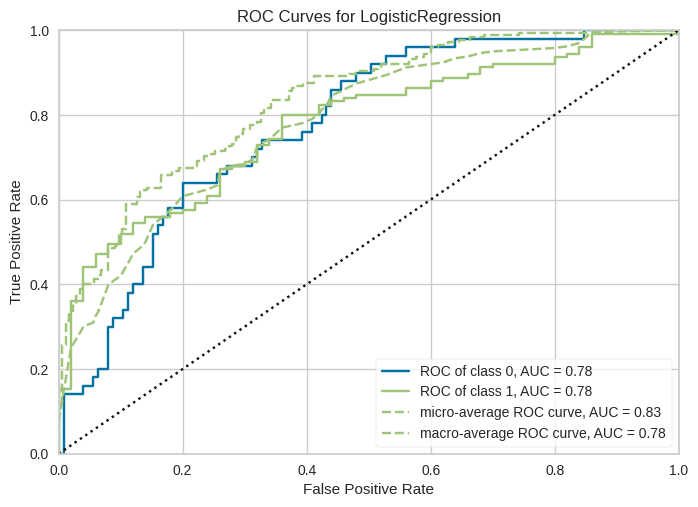

In [16]:
plot_model(tuned_lr,plot='auc')  # everythign is automatic in pycaret

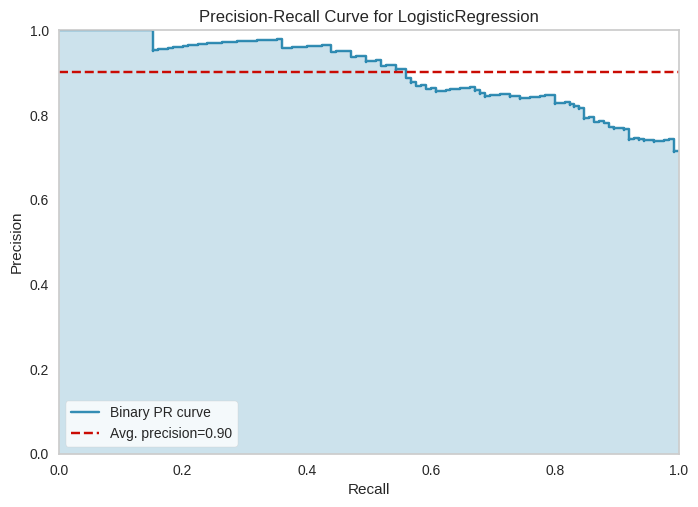

In [17]:
plot_model(tuned_lr,plot='pr')  # pr is for precision

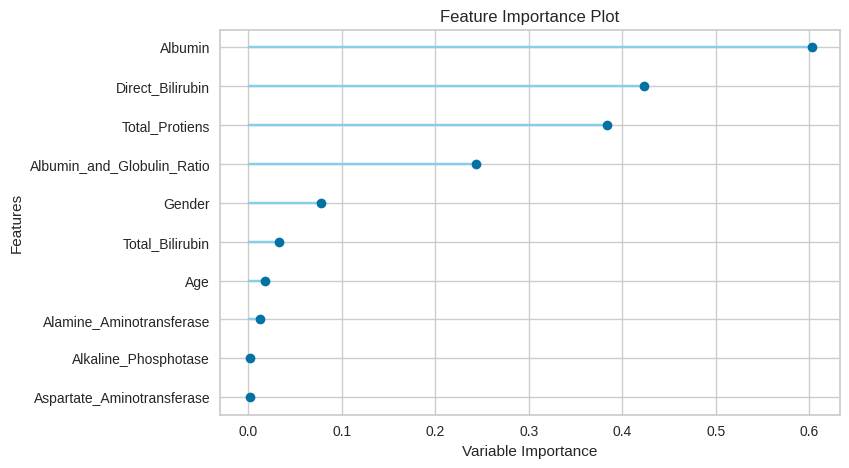

In [18]:
# which variable is high;;y significant
plot_model(tuned_lr,plot='feature')

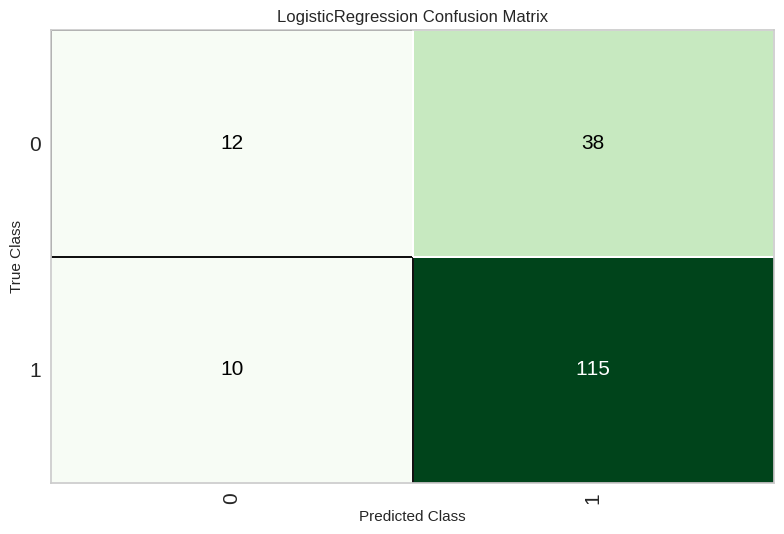

In [19]:
plot_model(tuned_lr,plot='confusion_matrix')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

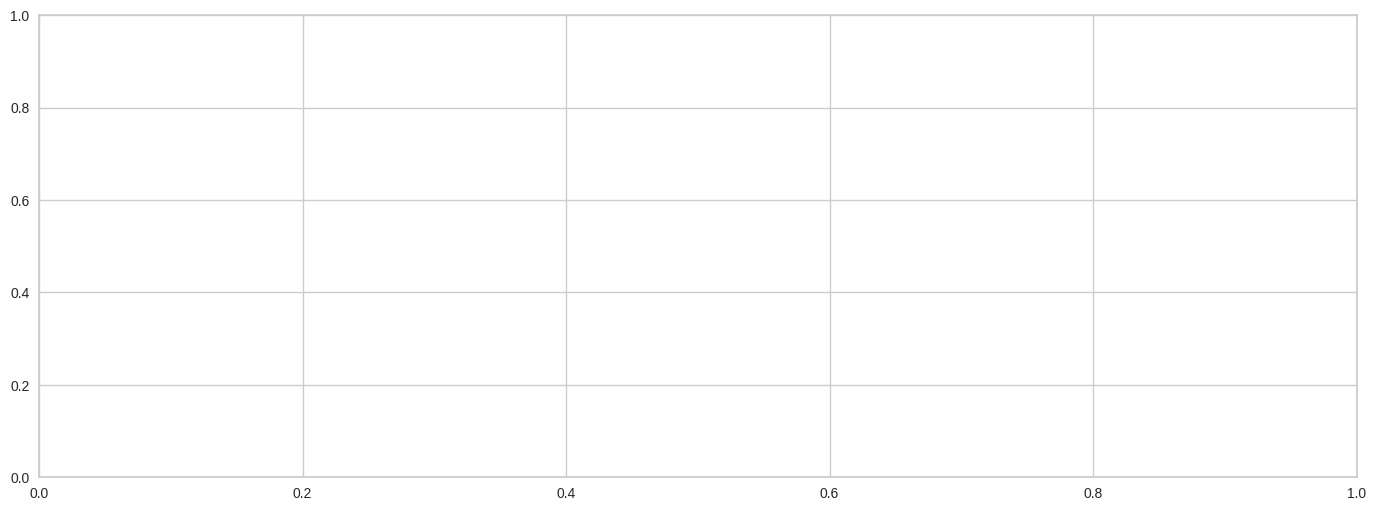

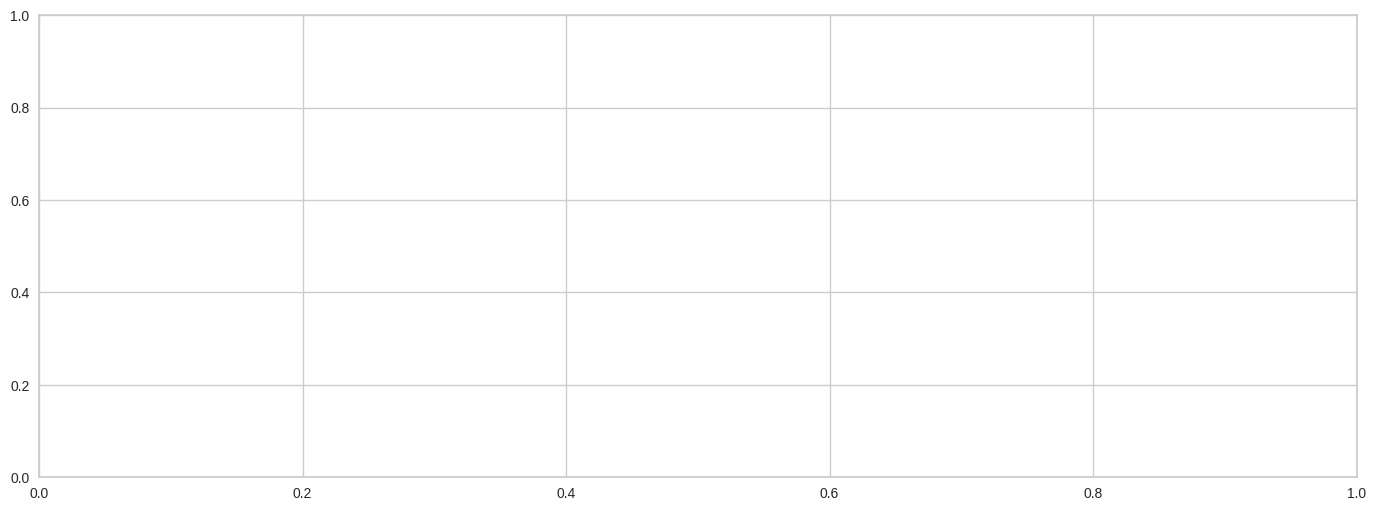

In [21]:
# evaluate model
evaluate_model(tuned_lr)
# we can click on tabs and explore like hyperparametermmauc,confusin matric etc
# some we are getting error as those things are ot applicable

In [ ]:
# predict the test data

testdata=predict_model(tuned_lr,data=test)
